## Question:-2
     Read the following data sets in Python and fit the linear regression (simple and multiple) model over it. Estimates the parameters [a and b for one predictor and one dependent variables (Y=aX+b); a, b, and c for two predictors and one dependent variables (Y=aX1+bX2+c)]. Calculate the performance measures viz. SSE, SST, R^2, AdjR^2, MSE, RMSE values. 

     Finally show iterative regression lines gradient descent optimization method for the following data sets. (Following data sets are publicly available in internet and/or UCI-ML, Kaggle repository)
1. Salary_data.csv
2. Credit_Card_Expences.csv
3. Real estate.csv

# Salary Dataset

## Linear Regression

In [170]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [171]:
salary_data = pd.read_csv("../Machine_Learning_assignments/Datasets/Salary_Data.csv")

In [172]:
salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [173]:
print("Missing values before imputation:\n", salary_data.isnull().sum())

Missing values before imputation:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [174]:
columns_to_impute = ['Years of Experience', 'Salary', 'Age']
salary_data_to_impute = salary_data[columns_to_impute]

imputer = SimpleImputer(strategy='mean')
salary_data_imputed = pd.DataFrame(imputer.fit_transform(salary_data_to_impute), columns=columns_to_impute)

salary_data[columns_to_impute] = salary_data_imputed

In [175]:
X_Simple = salary_data['Years of Experience'].values.reshape(-1,1)
Y_Simple = salary_data['Salary'].values.reshape(-1,1)

In [176]:
scaler = StandardScaler()
X_Simple_Scaled = scaler.fit_transform(X_Simple)
Y_Simple_Scaled = scaler.fit_transform(Y_Simple)

In [177]:
X_Train_Simple, X_Test_Simple, Y_Train_Simple, Y_Test_Simple = train_test_split(X_Simple_Scaled, Y_Simple_Scaled, test_size=0.2, train_size=0.8, random_state=42)

In [178]:
Simple_reg = LinearRegression()
Simple_reg.fit(X_Train_Simple, Y_Train_Simple)

LinearRegression()

In [179]:
Y_Pred_Simple = Simple_reg.predict(X_Test_Simple)

In [180]:
SSE_Simple = np.sum((Y_Test_Simple - Y_Pred_Simple)**2)

SST_Simple = np.sum((Y_Test_Simple - np.mean(Y_Test_Simple))**2)

R2_Simple = r2_score(Y_Test_Simple, Y_Pred_Simple)

AdjR2_Simple = 1 - (1-R2_Simple)*(len(Y_Test_Simple)-1)/(len(Y_Test_Simple)-1)

MSE_Simple = mean_squared_error(Y_Test_Simple, Y_Pred_Simple)

RMSE_Simple = np.sqrt(MSE_Simple)

In [181]:
print("Simple Linear Regression Results:")
print("SSE:", SSE_Simple)
print("SST:", SST_Simple)
print("R^2:", R2_Simple)
print("Adjusted R^2:", AdjR2_Simple)
print("MSE:", MSE_Simple)
print("RMSE:", RMSE_Simple)

Simple Linear Regression Results:
SSE: 446.5744657190336
SST: 1286.4726033255224
R^2: 0.6528690431769462
Adjusted R^2: 0.6528690431769462
MSE: 0.3330160072476015
RMSE: 0.5770753913030788


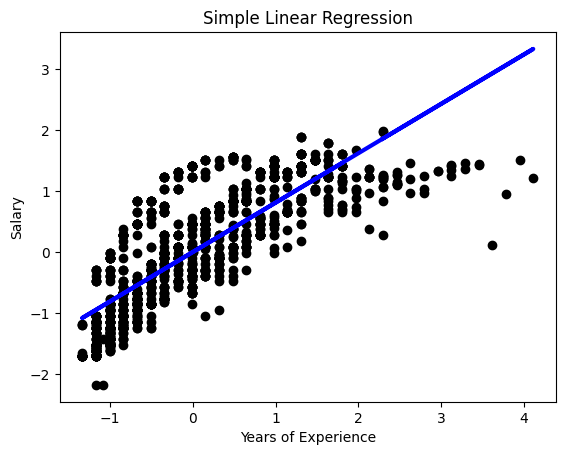

In [182]:
plt.scatter(X_Test_Simple, Y_Test_Simple, color='black')
plt.plot(X_Test_Simple, Y_Pred_Simple, color='blue', linewidth=3)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.show()

## Multiple Regression

In [183]:
X_Multiple = salary_data[['Years of Experience', 'Age']].values
Y_Multiple = salary_data['Salary'].values.reshape(-1,1)

In [184]:
X_Multiple

array([[ 5., 32.],
       [ 3., 28.],
       [15., 45.],
       ...,
       [ 4., 30.],
       [14., 46.],
       [ 1., 26.]])

In [185]:
Y_Multiple

array([[ 90000.],
       [ 65000.],
       [150000.],
       ...,
       [ 55000.],
       [140000.],
       [ 35000.]])

In [186]:
X_Multiple_Scaled = scaler.fit_transform(X_Multiple)
Y_Multiple_Scaled = scaler.fit_transform(Y_Multiple)

In [187]:
X_Train_Multiple, X_Test_Multiple, Y_Train_Multiple, Y_Test_Multiple = train_test_split(X_Multiple_Scaled, Y_Multiple_Scaled, test_size=0.2, train_size=0.8, random_state=42)

In [188]:
Multiple_reg = LinearRegression()
Multiple_reg.fit(X_Train_Multiple, Y_Train_Multiple)

LinearRegression()

In [189]:
Y_Pred_Multiple = Multiple_reg.predict(X_Test_Multiple)

In [190]:
SSE_Multiple = np.sum((Y_Test_Multiple - Y_Pred_Multiple)**2)

SST_Multiple = np.sum((Y_Test_Multiple - np.mean(Y_Test_Multiple))**2)

R2_Multiple = r2_score(Y_Test_Multiple, Y_Pred_Multiple)

AdjR2_Multiple = 1 - (1-R2_Multiple)*(len(Y_Test_Multiple)-1)/(len(Y_Test_Multiple)-1)

MSE_Multiple = mean_squared_error(Y_Test_Multiple, Y_Pred_Multiple)

RMSE_Multiple = np.sqrt(MSE_Simple)

In [191]:
print("Multiple Linear Regression Results:")
print("SSE:", SSE_Multiple)
print("SST:", SST_Multiple)
print("R^2:", R2_Multiple)
print("Adjusted R^2:", AdjR2_Multiple)
print("MSE:", MSE_Multiple)
print("RMSE:", RMSE_Multiple)

Multiple Linear Regression Results:
SSE: 437.91277758048176
SST: 1286.4726033255224
R^2: 0.6596019406488095
Adjusted R^2: 0.6596019406488095
MSE: 0.3265568811189275
RMSE: 0.5770753913030788


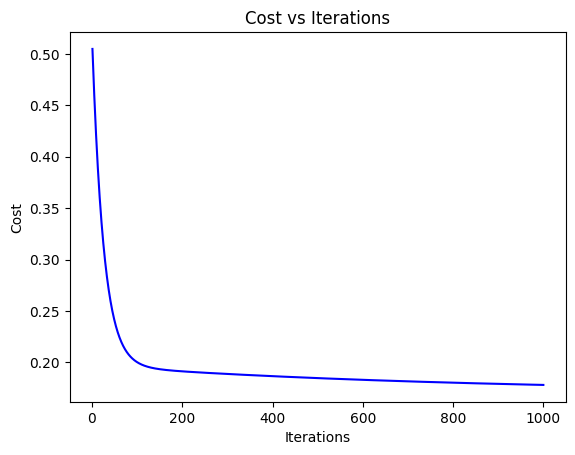

In [192]:
# Gradient Descent function for multiple linear regression
def gradient_descent_multiple(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, theta.shape[0]))  # Initialize theta_history with the correct shape
    
    for i in range(iterations):
        # Hypothesis function
        h = X.dot(theta)
        # Error
        error = h - y
        # Gradient calculation
        gradient = X.T.dot(error) / m
        # Update parameters
        theta = theta - alpha * gradient
        # Cost function
        cost = np.sum((error ** 2)) / (2 * m)
        cost_history[i] = cost
        theta_history[i] = theta.flatten()  # Flatten theta to ensure it's a 1D array
        
    return theta, cost_history, theta_history
# Initialize parameters
theta = np.zeros((X_Train_Multiple.shape[1],1))
alpha = 0.01
iterations = 1000

# Run gradient descent
theta_final, cost_history, theta_history = gradient_descent_multiple(X_Train_Multiple, Y_Train_Multiple.reshape(-1,1), theta, alpha, iterations)

# Plotting cost history
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

# ______________________________________________________________________________

# ______________________________________________________________________________

# Credit Card Dataset

## Linear Regression

In [193]:
Credit_card_data = pd.read_csv("../Machine_Learning_assignments/Datasets/Credit_Card_Expenses.csv")

In [194]:
Credit_card_data

,Month,CC_Expenses,Amount
0,1,55,3543
1,2,65,4670
2,3,59,1039
3,4,59,1635
4,5,57,1288
5,6,61,2318
6,7,53,1885
7,8,63,4956
8,9,59,2124
9,10,57,1980


In [195]:
X1_Simple = Credit_card_data['Month'].values.reshape(-1,1)
Y1_Simple = Credit_card_data['CC_Expenses'].values.reshape(-1,1)

In [196]:
X1_Simple

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20]], dtype=int64)

In [197]:
Y1_Simple

array([[55],
       [65],
       [59],
       [59],
       [57],
       [61],
       [53],
       [63],
       [59],
       [57],
       [63],
       [55],
       [61],
       [61],
       [57],
       [59],
       [61],
       [57],
       [59],
       [63]], dtype=int64)

In [198]:
X1_Simple_Scaled = scaler.fit_transform(X1_Simple)
Y1_Simple_Scaled = scaler.fit_transform(Y1_Simple)

In [199]:
X1_Train_Simple, X1_Test_Simple, Y1_Train_Simple, Y1_Test_Simple = train_test_split(X1_Simple_Scaled, Y1_Simple_Scaled, test_size=0.2, train_size=0.8, random_state=42)

In [200]:
Simple_reg = LinearRegression()
Simple_reg.fit(X1_Train_Simple, Y1_Train_Simple)

LinearRegression()

In [201]:
Y1_Pred_Simple = Simple_reg.predict(X1_Test_Simple)

In [202]:
SSE_Simple1 = np.sum((Y1_Test_Simple - Y1_Pred_Simple)**2)

SST_Simple1 = np.sum((Y1_Test_Simple - np.mean(Y1_Test_Simple))**2)

R2_Simple1 = r2_score(Y1_Test_Simple, Y1_Pred_Simple)

AdjR2_Simple1 = 1 - (1-R2_Simple1)*(len(Y1_Test_Simple)-1)/(len(Y1_Test_Simple)-1)

MSE_Simple1 = mean_squared_error(Y1_Test_Simple, Y1_Pred_Simple)

RMSE_Simple1 = np.sqrt(MSE_Simple1)

In [203]:
print("Simple Linear Regression Results:")
print("SSE:", SSE_Simple1)
print("SST:", SST_Simple1)
print("R^2:", R2_Simple1)
print("Adjusted R^2:", AdjR2_Simple1)
print("MSE:", MSE_Simple1)
print("RMSE:", RMSE_Simple1)

Simple Linear Regression Results:
SSE: 7.646804269085154
SST: 6.11353711790393
R^2: -0.25079869830035717
Adjusted R^2: -0.25079869830035717
MSE: 1.9117010672712884
RMSE: 1.3826427836832218


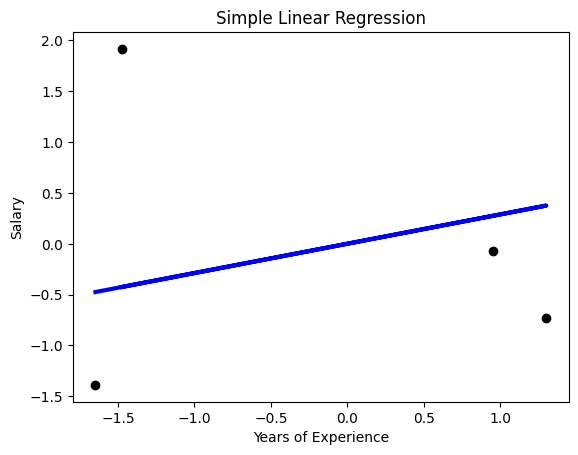

In [204]:
plt.scatter(X1_Test_Simple, Y1_Test_Simple, color='black')
plt.plot(X1_Test_Simple, Y1_Pred_Simple, color='blue', linewidth=3)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.show()

# ______________________________________________________________________________

# Read Estate Dataset

## Linear Regression

In [212]:
Real_estate_data = pd.read_csv("../Machine_Learning_assignments/Datasets/Real estate.csv")

In [213]:
Real_estate_data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [214]:
X2_Simple = Real_estate_data['X2 house age'].values.reshape(-1,1)
Y2_Simple = Real_estate_data['Y house price of unit area'].values.reshape(-1,1)

In [215]:
X2_Simple

array([[32. ],
       [19.5],
       [13.3],
       [13.3],
       [ 5. ],
       [ 7.1],
       [34.5],
       [20.3],
       [31.7],
       [17.9],
       [34.8],
       [ 6.3],
       [13. ],
       [20.4],
       [13.2],
       [35.7],
       [ 0. ],
       [17.7],
       [16.9],
       [ 1.5],
       [ 4.5],
       [10.5],
       [14.7],
       [10.1],
       [39.6],
       [29.3],
       [ 3.1],
       [10.4],
       [19.2],
       [ 7.1],
       [25.9],
       [29.6],
       [37.9],
       [16.5],
       [15.4],
       [13.9],
       [14.7],
       [12. ],
       [ 3.1],
       [16.2],
       [13.6],
       [16.8],
       [36.1],
       [34.4],
       [ 2.7],
       [36.6],
       [21.7],
       [35.9],
       [24.2],
       [29.4],
       [21.7],
       [31.3],
       [32.1],
       [13.3],
       [16.1],
       [31.7],
       [33.6],
       [ 3.5],
       [30.3],
       [13.3],
       [11. ],
       [ 5.3],
       [17.2],
       [ 2.6],
       [17.5],
       [40.1],
       [ 1

In [216]:
Y2_Simple

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

In [217]:
X2_Simple_Scaled = scaler.fit_transform(X2_Simple)
Y2_Simple_Scaled = scaler.fit_transform(Y2_Simple)

In [218]:
X2_Train_Simple, X2_Test_Simple, Y2_Train_Simple, Y2_Test_Simple = train_test_split(X2_Simple_Scaled, Y2_Simple_Scaled, test_size=0.2, train_size=0.8, random_state=42)

In [219]:
Simple_reg = LinearRegression()
Simple_reg.fit(X2_Train_Simple, Y2_Train_Simple)

LinearRegression()

In [220]:
Y2_Pred_Simple = Simple_reg.predict(X2_Test_Simple)

In [221]:
SSE_Simple2 = np.sum((Y2_Test_Simple - Y2_Pred_Simple)**2)

SST_Simple2 = np.sum((Y2_Test_Simple - np.mean(Y2_Test_Simple))**2)

R2_Simple2 = r2_score(Y2_Test_Simple, Y2_Pred_Simple)

AdjR2_Simple2 = 1 - (1-R2_Simple2)*(len(Y2_Test_Simple)-1)/(len(Y2_Test_Simple)-1)

MSE_Simple2 = mean_squared_error(Y2_Test_Simple, Y2_Pred_Simple)

RMSE_Simple2 = np.sqrt(MSE_Simple2)

In [222]:
print("Simple Linear Regression Results:")
print("SSE:", SSE_Simple2)
print("SST:", SST_Simple2)
print("R^2:", R2_Simple2)
print("Adjusted R^2:", AdjR2_Simple2)
print("MSE:", MSE_Simple2)
print("RMSE:", RMSE_Simple2)

Simple Linear Regression Results:
SSE: 74.24373381449507
SST: 75.39179286733511
R^2: 0.015227904910820267
Adjusted R^2: 0.015227904910820267
MSE: 0.8945028170421093
RMSE: 0.9457815905599503


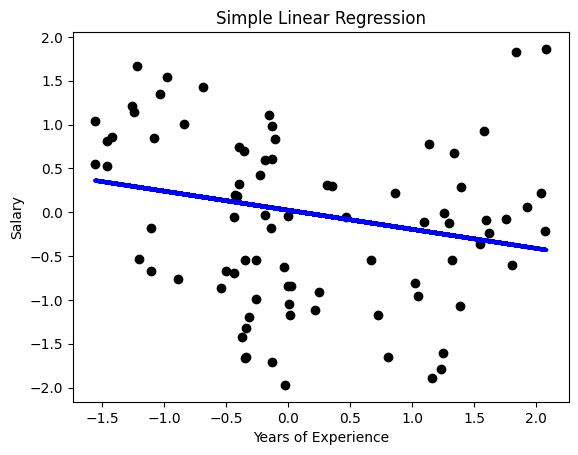

In [223]:
plt.scatter(X2_Test_Simple, Y2_Test_Simple, color='black')
plt.plot(X2_Test_Simple, Y2_Pred_Simple, color='blue', linewidth=3)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.show()

## Multiple Regression

In [224]:
X2_Multiple = Real_estate_data[['X2 house age','X4 number of convenience stores']].values
Y2_Multiple = Real_estate_data['Y house price of unit area'].values.reshape(-1,1)

In [225]:
X2_Multiple

array([[32. , 10. ],
       [19.5,  9. ],
       [13.3,  5. ],
       [13.3,  5. ],
       [ 5. ,  5. ],
       [ 7.1,  3. ],
       [34.5,  7. ],
       [20.3,  6. ],
       [31.7,  1. ],
       [17.9,  3. ],
       [34.8,  1. ],
       [ 6.3,  9. ],
       [13. ,  5. ],
       [20.4,  4. ],
       [13.2,  4. ],
       [35.7,  2. ],
       [ 0. ,  6. ],
       [17.7,  1. ],
       [16.9,  8. ],
       [ 1.5,  7. ],
       [ 4.5,  3. ],
       [10.5,  7. ],
       [14.7,  1. ],
       [10.1,  7. ],
       [39.6,  4. ],
       [29.3,  2. ],
       [ 3.1,  5. ],
       [10.4,  5. ],
       [19.2,  4. ],
       [ 7.1,  5. ],
       [25.9,  0. ],
       [29.6,  7. ],
       [37.9,  1. ],
       [16.5,  6. ],
       [15.4,  7. ],
       [13.9,  0. ],
       [14.7,  2. ],
       [12. ,  1. ],
       [ 3.1,  6. ],
       [16.2,  5. ],
       [13.6,  0. ],
       [16.8,  0. ],
       [36.1,  5. ],
       [34.4,  6. ],
       [ 2.7,  4. ],
       [36.6,  8. ],
       [21.7,  9. ],
       [35.9,

In [226]:
Y2_Multiple

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

In [227]:
X2_Multiple_Scaled = scaler.fit_transform(X2_Multiple)
Y2_Multiple_Scaled = scaler.fit_transform(Y2_Multiple)

In [228]:
X2_Train_Multiple, X2_Test_Multiple, Y2_Train_Multiple, Y2_Test_Multiple = train_test_split(X2_Multiple_Scaled, Y2_Multiple_Scaled, test_size=0.2, train_size=0.8, random_state=42)

In [229]:
Multiple_reg.fit(X2_Train_Multiple, Y2_Train_Multiple)

LinearRegression()

In [230]:
Y2_Pred_Multiple = Multiple_reg.predict(X2_Test_Multiple)

In [231]:
SSE_Multiple2 = np.sum((Y2_Test_Multiple - Y2_Pred_Multiple)**2)

SST_Multiple2 = np.sum((Y2_Test_Multiple - np.mean(Y2_Test_Multiple))**2)

R2_Multiple2 = r2_score(Y2_Test_Multiple, Y2_Pred_Multiple)

AdjR2_Multiple2 = 1 - (1-R2_Multiple2)*(len(Y2_Test_Multiple)-1)/(len(Y2_Test_Multiple)-1)

MSE_Multiple2 = mean_squared_error(Y2_Test_Multiple, Y2_Pred_Multiple)

RMSE_Multiple2 = np.sqrt(MSE_Simple2)

In [232]:
print("Multiple Linear Regression Results:")
print("SSE:", SSE_Multiple2)
print("SST:", SST_Multiple2)
print("R^2:", R2_Multiple2)
print("Adjusted R^2:", AdjR2_Multiple2)
print("MSE:", MSE_Multiple2)
print("RMSE:", RMSE_Multiple2)

Multiple Linear Regression Results:
SSE: 41.670914349935146
SST: 75.39179286733511
R^2: 0.4472751905069784
Adjusted R^2: 0.4472751905069784
MSE: 0.5020592090353632
RMSE: 0.9457815905599503


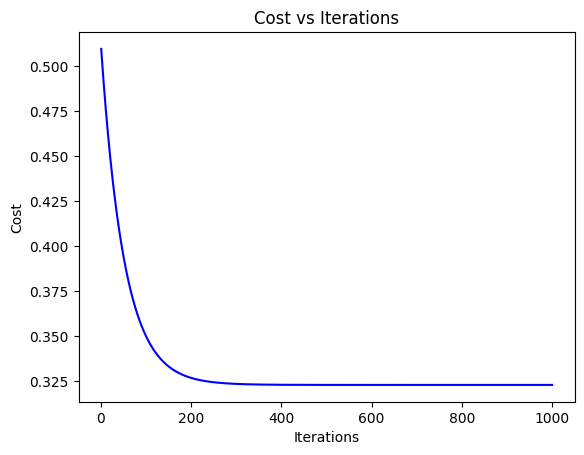

In [233]:
# Gradient Descent function for multiple linear regression
def gradient_descent_multiple(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, theta.shape[0]))  # Initialize theta_history with the correct shape
    
    for i in range(iterations):
        # Hypothesis function
        h = X.dot(theta)
        # Error
        error = h - y
        # Gradient calculation
        gradient = X.T.dot(error) / m
        # Update parameters
        theta = theta - alpha * gradient
        # Cost function
        cost = np.sum((error ** 2)) / (2 * m)
        cost_history[i] = cost
        theta_history[i] = theta.flatten()  # Flatten theta to ensure it's a 1D array
        
    return theta, cost_history, theta_history
# Initialize parameters
theta = np.zeros((X2_Train_Multiple.shape[1],1))
alpha = 0.01
iterations = 1000

# Run gradient descent
theta_final, cost_history, theta_history = gradient_descent_multiple(X2_Train_Multiple, Y2_Train_Multiple.reshape(-1,1), theta, alpha, iterations)

# Plotting cost history
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()